## SEGMENTING AND COUNTING LEMONS USING OpenCV

### Importing the dependencies

In [224]:
import numpy as np
import cv2
import matplotlib
from matplotlib import colors
import matplotlib.pyplot as plt
import time
%matplotlib inline

### Helper Functions

In [225]:
def show(image):
    plt.figure(figsize=(5, 5))
    plt.imshow(image, interpolation='nearest')
    
def show_mask(mask):
    plt.imshow(mask, cmap='gray')    

#### Loading the Image

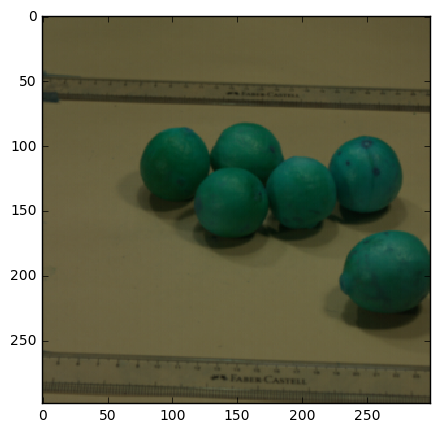

In [226]:
bgr_image = cv2.imread('lemons1.jpg')
img = bgr_image.copy()
show(bgr_image)

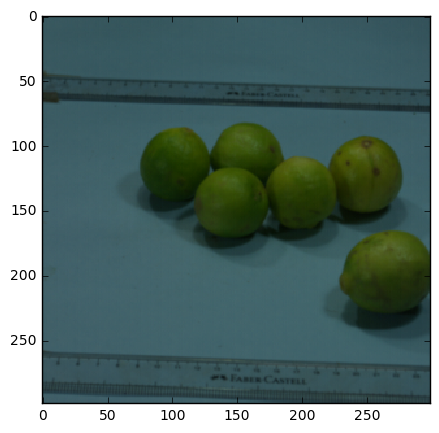

In [227]:
rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)
show(rgb_image)

#### Exploring the features 

In [228]:
m,n,r = bgr_image.shape
arr = image.reshape(m*n, -1)
df = pd.DataFrame(arr, columns=['b', 'g', 'r'])
df.describe()

,b,g,r
count,89401.000000,89401.000000,89401.000000
mean,98.430320,75.364548,49.651257
std,62.517088,30.621731,20.656442
min,0.000000,0.000000,0.000000
25%,76.000000,66.000000,44.000000
50%,99.000000,89.000000,57.000000
75%,106.000000,96.000000,64.000000
max,255.000000,112.000000,97.000000


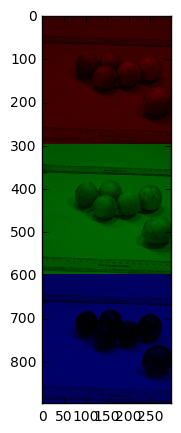

In [229]:
images = []
for i in [0, 1, 2]:
    colour = rgb_image.copy()
    if i != 0: colour[:,:,0] = 0
    if i != 1: colour[:,:,1] = 0
    if i != 2: colour[:,:,2] = 0
    images.append(colour)
    
show(np.vstack(images))

### R, G, B value histograms for the image

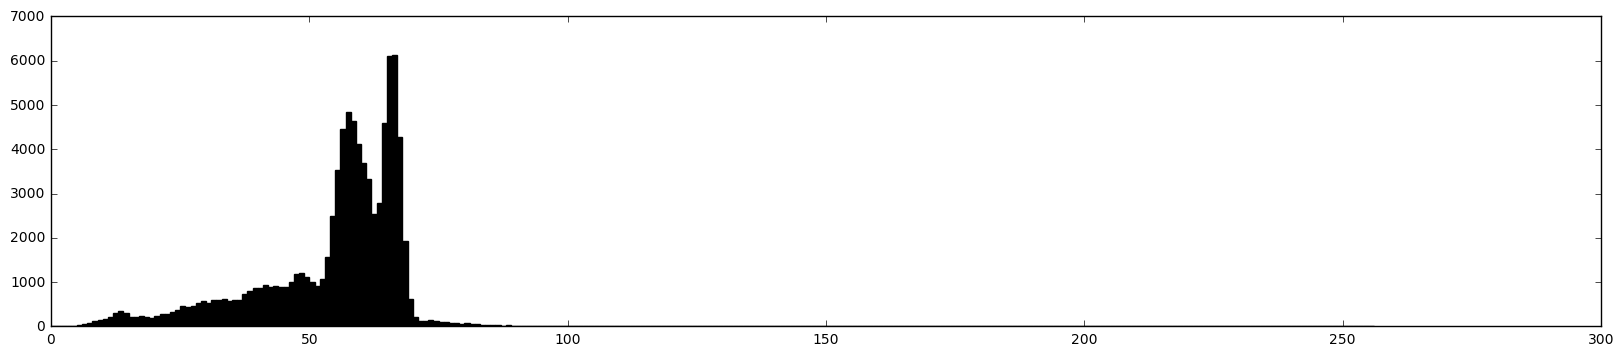

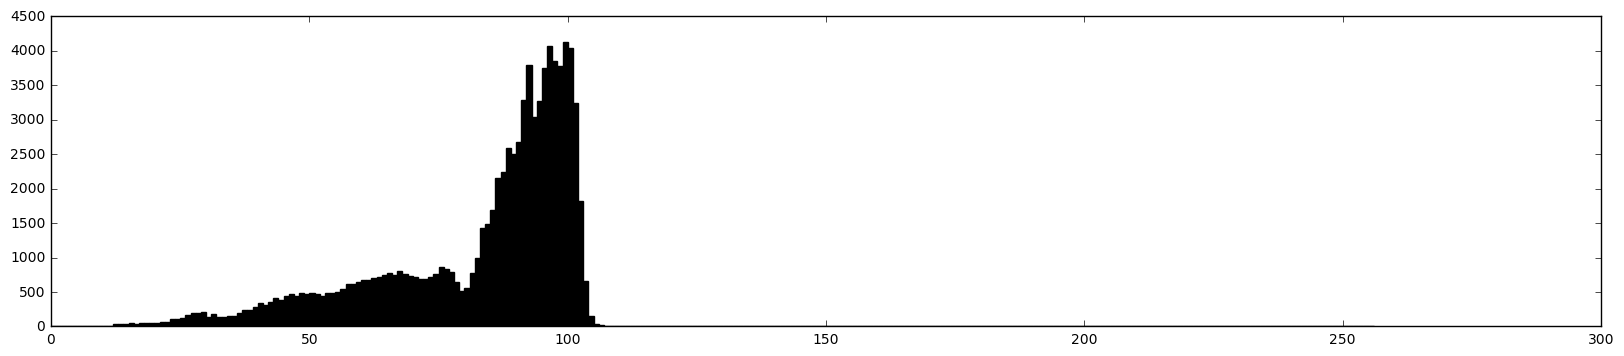

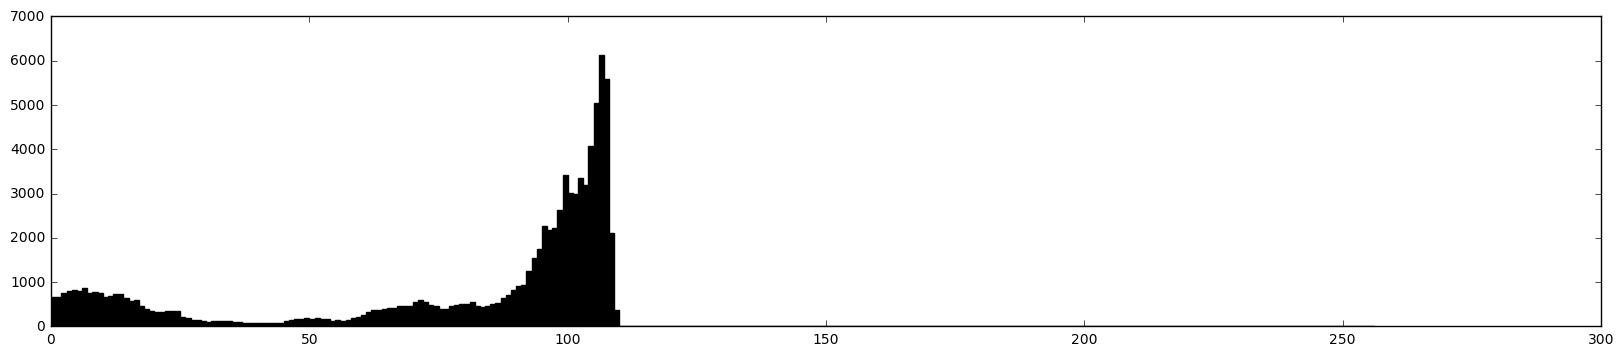

In [230]:
def show_rgb_hist(image):
    colours = ('r','g','b')
    for i, c in enumerate(colours):
        plt.figure(figsize=(20, 4))
        histr = cv2.calcHist([image], [i], None, [256], [0, 256])
        
        if c == 'r': colours = [((i/256, 0, 0)) for i in range(0, 256)]
        if c == 'g': colours = [((0, i/256, 0)) for i in range(0, 256)]
        if c == 'b': colours = [((0, 0, i/256)) for i in range(0, 256)]
        
        plt.bar(range(0, 256), histr, color=colours, edgecolor=colours, width=1)
        plt.show()
    
show_rgb_hist(rgb_image)

### Converting to HSV
#### HSV separates luma (or the image intensity) from  the color information

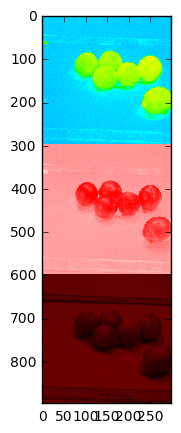

In [231]:
hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)

images = []
for i in [0, 1, 2]:
    colour = hsv.copy()
    if i != 0: colour[:,:,0] = 0
    if i != 1: colour[:,:,1] = 255
    if i != 2: colour[:,:,2] = 255
    images.append(colour)
    
hsv_stack = np.vstack(images)
rgb_stack = cv2.cvtColor(hsv_stack, cv2.COLOR_HSV2RGB)
show(rgb_stack)

### H, S, V value histograms for the image

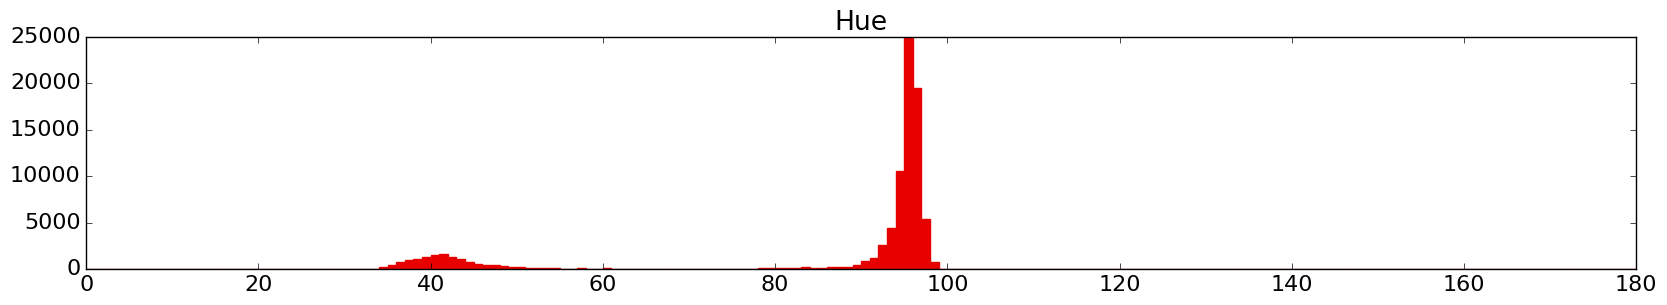

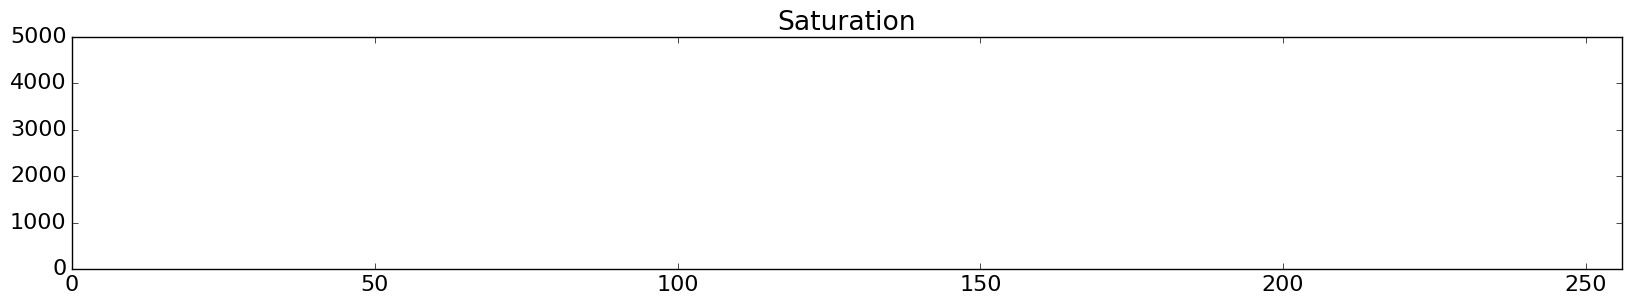

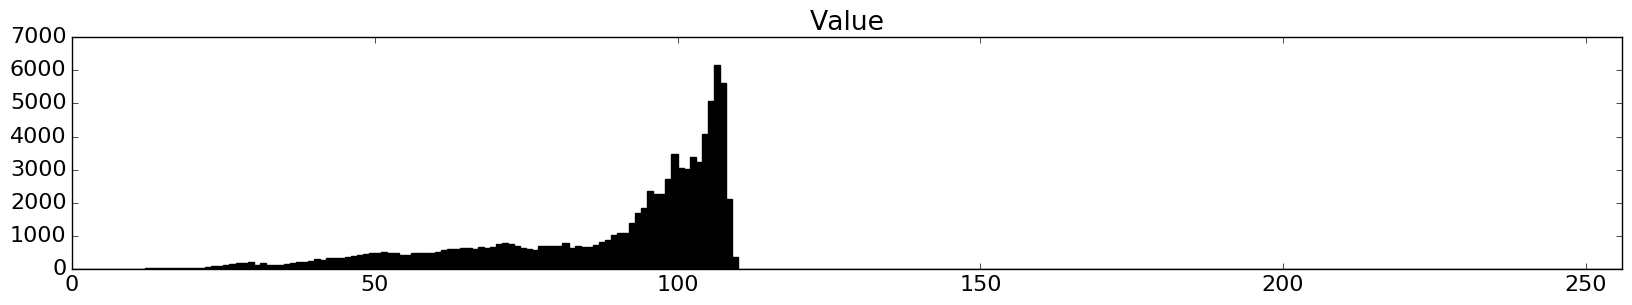

In [232]:
matplotlib.rcParams.update({'font.size': 16})

def show_hsv_hist(image):
    # Hue
    plt.figure(figsize=(20, 3))
    histr = cv2.calcHist([image], [0], None, [180], [0, 180])
    plt.xlim([0, 180])
    colours = [colors.hsv_to_rgb((i/180, 1, 0.9)) for i in range(0, 180)]
    plt.bar(range(0, 180), histr, color=colours, edgecolor=colours, width=1)
    plt.title('Hue')

    # Saturation
    plt.figure(figsize=(20, 3))
    histr = cv2.calcHist([image], [1], None, [256], [0, 256])
    plt.xlim([0, 256])

    colours = [colors.hsv_to_rgb((0, i/256, 1)) for i in range(0, 256)]
    plt.bar(range(0, 256), histr, color=colours, edgecolor=colours, width=1)
    plt.title('Saturation')

    # Value
    plt.figure(figsize=(20, 3))
    histr = cv2.calcHist([image], [2], None, [256], [0, 256])
    plt.xlim([0, 256])

    colours = [colors.hsv_to_rgb((0, 1, i/256)) for i in range(0, 256)]
    plt.bar(range(0, 256), histr, color=colours, edgecolor=colours, width=1)
    plt.title('Value')
    
show_hsv_hist(hsv)

###  To focus only on color and segmentation, we blur the image

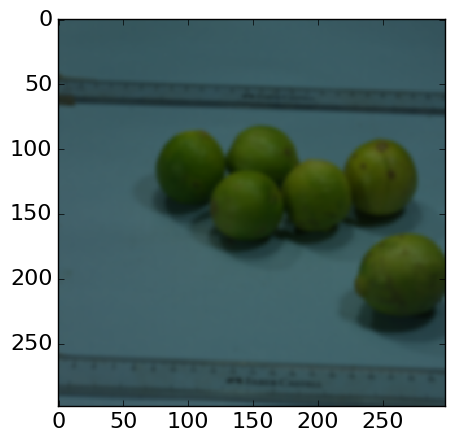

In [233]:
image_blur = cv2.GaussianBlur(rgb_image, (7, 7), 0)
#blur = cv2.GaussianBlur(img, (7, 7), 0)
show(image_blur)

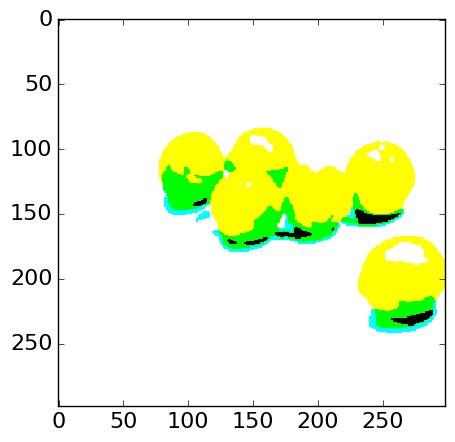

In [234]:
gray = cv2.cvtColor(image_blur, cv2.COLOR_RGB2GRAY)
ret,thresh1 = cv2.threshold(image_blur, 25, 255, cv2.THRESH_BINARY)
show(thresh1)

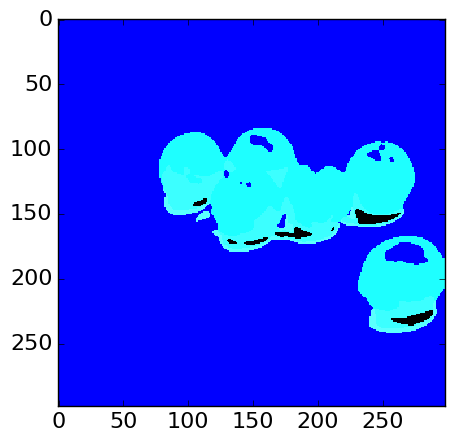

In [235]:
hsv = cv2.cvtColor(thresh1, cv2.COLOR_RGB2HSV)
show(hsv)

### Applying Canny filter for edge detection

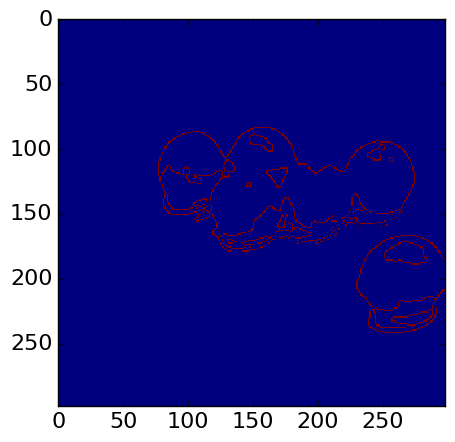

In [236]:
## CANNY FILTER FOR EDGES
canny = cv2.Canny(thresh1, 0, 0)
show(canny)

### Counting the number of lemons using HoughCircles()

In [259]:
start = time.time()

output = image.copy()
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
gray = cv2.cvtColor(hsv, cv2.COLOR_BGR2GRAY)

lemons = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 125, 150, 150, 10 ,10)


no_of_lemons = 0  
if lemons is not None:
    lemons = np.round(lemons[0, :]).astype("int")
    no_of_lemons = len(lemons)

    for (x, y, r) in lemons:
        cv2.circle(output, (x, y), r, (0, 255, 0), 4)

print ('no of lemons : {}'.format(no_of_lemons))
end = time.time()
print ("Seconds taken for prediction: {}".format(end - start))

no of lemons : 6
Seconds taken for prediction: 0.0250000953674


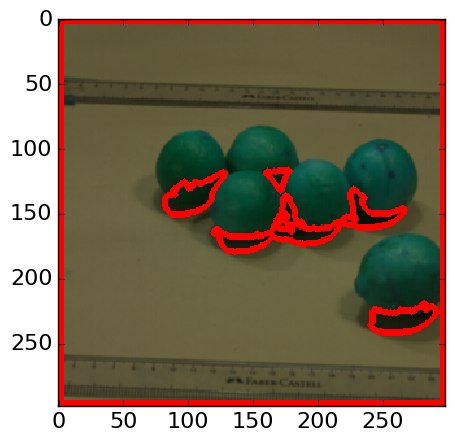

In [258]:
gray = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2GRAY)
ret, thresh2 = cv2.threshold(gray, 66, 255, 0)

_, contours, hierarchy = cv2.findContours(thresh2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contour_list = []
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 100 :
        contour_list.append(contour)
        
cv2.drawContours(canny, contour_list,  -1, (255,0,0), 3)
show(image)

## Summary

It is clear that the model could not segment the lemons properly but the count was correct. I also implemented a custom Haar Cascade model with 2000 negatives and double tthe postives from an Imagenet Dataset. But the results were not satisfactory and so I decided to use HoughCircles.